In [1]:
import pandas as pd
csvFileName  = 'master996.csv'
data = pd.read_csv ( open ( csvFileName ), delimiter=';',encoding= 'unicode_escape')

In [2]:
#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067

data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

#Checkign the values

data.sort_values(by=['FileNo'], inplace=True)
data

,Book_Name,book_id,guten_genre,Author_Name,FileNo
961,Alice's Adventures in Wonderland,pg11CarolAlice.epub,Literary,Carroll| Lewis,11
962,Through the Looking-Glass,pg12CarolGlassLook.epub,Literary,Carroll| Lewis,12
995,A Tale of Two Cities,pg98DickensTaleCities.epub,Literary,Dickens| Charles,98
958,Persuasion,pg105JaneAusPersuatn.epub,Literary,Austen| Jane,105
959,Return of Sherlock Holmes,pg108DoyleReturnSherlk.epub,Detective and Mystery,Connan| Doyle,108
...,...,...,...,...,...
863,Kate Vernon: A Tale. Vol. 2 (of 3),pg53356.epub,Literary,Alexander| Mrs.,53356
864,The Touch of Abner,pg53604.epub,Literary,Cody| H. A.,53604
865,Kate Vernon: A Tale. Vol. 3 (of 3),pg53668.epub,Literary,Alexander| Mrs.,53668
964,Mardi: and A Voyage Thither I,pg13720HermanVoyage1.epub,Sea and Adventure,Melville| Herman,137201


In [3]:
import glob

# Getting all files and its names into dict and then converting to dataframe"""

Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit
files = glob.glob("Books\*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')

In [15]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()
#Renaming column names
df.columns = ['File_Name', 'Data']
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
left = df
right = data
result = pd.merge(left, right , how='inner', on=['FileNo', 'FileNo'])

#Checking resulting dataframe
result.info()

#Dropping unnecessery columns

books=result.drop(['File_Name', 'book_id'], axis=1)
books.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   File_Name    996 non-null    object
 1   Data         996 non-null    object
 2   FileNo       996 non-null    int32 
 3   Book_Name    996 non-null    object
 4   book_id      996 non-null    object
 5   guten_genre  996 non-null    object
 6   Author_Name  996 non-null    object
dtypes: int32(1), object(6)
memory usage: 58.4+ KB


,Data,FileNo,Book_Name,guten_genre,Author_Name
0,<p>A Detective Story\n<p>A.B.M. Fellow-Sherloc...,10067,The Mystery of the Boule Cabinet: A Detective ...,Detective and Mystery,Stevenson| Burton Egbert
1,<p>This edition first published 1916\n<p>The t...,1032,The Pupil,Literary,James| Henry
2,"<p>""Until this moment I have never fully reali...",10379,At Love's Cost,Literary,Garvice| Charles
3,"<p>""The Rider of Golden Bar,"" ""Hidden Trails,""...",10473,The Heart of the Range,Western Stories,White| William Patterson
4,"<p>Sir Walter Elliot, of Kellynch Hall, in Som...",105,Persuasion,Literary,Austen| Jane


In [16]:
from collections import Counter
print('Dataset shape %s' % Counter(books['guten_genre']))

Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36, 'Western Stories': 18, 'Love and Romance': 18, 'Ghost and Horror': 6, 'Humorous and Wit and Satire': 6, 'Christmas Stories': 5, 'Allegories': 2})


In [29]:
s_a_books = books['guten_genre'] =='Sea and Adventure'
s_a_df = books[s_a_books]
w_s_books = books['guten_genre'] =='Western Stories'
w_s_df = books[w_s_books]
l_r_books = books['guten_genre'] =='Love and Romance'
l_r_df = books[l_r_books]
g_h_books = books['guten_genre'] =='Ghost and Horror'
g_h_df = books[g_h_books]
h_t_books = books['guten_genre'] =='Humorous and Wit and Satire'
h_t_df = books[h_t_books]
l_books = books['guten_genre'] =='Literary'
l_df = books[l_books]
d_m_books = books['guten_genre'] =='Detective and Mystery'
d_m_df = books[d_m_books]
c_s_books = books['guten_genre'] =='Christmas Stories'
c_s_df = books[c_s_books]
sample_books = pd.concat([s_a_df.head(5),w_s_df.head(5),l_r_df.head(5),g_h_df.head(5),h_t_df.head(5),l_df.head(5),d_m_df.head(5),c_s_df.head(5)])
sample_books.shape

(40, 5)

In [30]:
sample_books.head(5)

,Data,FileNo,Book_Name,guten_genre,Author_Name
54,"<p>DEDICATED TO My Brother, ALLAN MELVILLE.\n<...",137201,Mardi: and A Voyage Thither I,Sea and Adventure,Melville| Herman
55,<p>We were now voyaging straight for Maramma; ...,137212,Mardi: and A Voyage Thither ||,Sea and Adventure,Melville| Herman
63,"<p>""Looking up, he saw a slender little girl i...",14079,Sandy,Sea and Adventure,Rice| Alice Caldwell Hegan
155,<p>FROM the heart of a great hill land Glenave...,17047,The Half-Hearted,Sea and Adventure,Buchan| John
240,<p>This is a yarn of the days when the clipper...,21067,Overdue: The Story of a Missing Ship,Sea and Adventure,Collingwood| Harry


In [31]:
from collections import Counter
print('Dataset shape %s' % Counter(sample_books['guten_genre']))

Dataset shape Counter({'Sea and Adventure': 5, 'Western Stories': 5, 'Love and Romance': 5, 'Ghost and Horror': 5, 'Humorous and Wit and Satire': 5, 'Literary': 5, 'Detective and Mystery': 5, 'Christmas Stories': 5})


In [8]:
books = books[books['guten_genre'].isin(['Sea and Adventure','Western Stories','Love and Romance','Christmas Stories','Ghost and Horror'])]
books.head()
from collections import Counter
print('Dataset shape %s' % Counter(books['guten_genre']))

Dataset shape Counter({'Sea and Adventure': 36, 'Western Stories': 18, 'Love and Romance': 18, 'Ghost and Horror': 6, 'Christmas Stories': 5})


In [32]:
from bs4 import BeautifulSoup
sample_books['Data']= [BeautifulSoup(text).get_text() for text in sample_books['Data'] ]
sample_books.head()
sample_books.to_csv('books.csv')

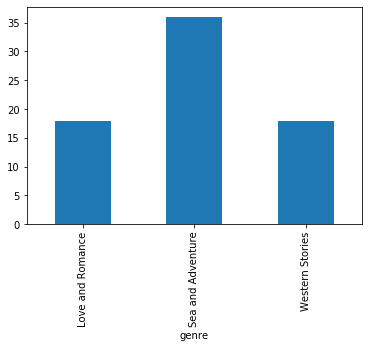

<Figure size 432x288 with 0 Axes>

In [12]:
# This is to see number of books per authors, but so many authors hence useless
#ax = sns.barplot(x = books['Author_Name'], y = books['FileNo'])

#Plotting number of authors per gerne
import matplotlib.pyplot as plt
books.groupby('genre')['data'].count().plot(kind = 'bar')
plt.show()
plt.clf()


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Dataset shape %s' % Counter(books['genre']))
sm= RandomUnderSampler()
X_res, y_res = sm.fit_resample(books['data'], books['genre'])
print('Resampled dataset shape %s' % Counter(y_res))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
print('Dataset shape %s' % Counter(books['genre']))
only_majority = books[books['genre'].isin(['Literary', 'Detective and Mystery', 'Sea and Adventure'])]
print('Dataset shape %s' % Counter(only_majority['genre']))
sm= RandomUnderSampler()
X_res, y_res = sm.fit_resample(only_majority['data'], only_majority['genre'])
print('Resampled dataset shape %s' % Counter(y_res))

Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36, 'Western Stories': 18, 'Love and Romance': 18, 'Humorous and Wit and Satire': 6, 'Ghost and Horror': 6, 'Christmas Stories': 5, 'Allegories': 2})
Dataset shape Counter({'Literary': 794, 'Detective and Mystery': 111, 'Sea and Adventure': 36})


In [10]:
import pandas as pd
df = pd.read_csv("books.csv")
df = pd.DataFrame(df)
df = df[['Data', 'guten_genre']]

In [11]:
df.head(5)

,Data,guten_genre
0,"DEDICATED TO My Brother, ALLAN MELVILLE.\nNot ...",Sea and Adventure
1,We were now voyaging straight for Maramma; whe...,Sea and Adventure
2,"""Looking up, he saw a slender little girl in a...",Sea and Adventure
3,FROM the heart of a great hill land Glenavelin...,Sea and Adventure
4,This is a yarn of the days when the clipper sa...,Sea and Adventure


In [12]:
df.to_csv("books.csv")